ALUNO: GABRIEL HENRIQUE MENONCIN | MATRICULA: 2121101065

# Trabalho T3 - Redes Neurais Recorrentes

Este trabalho tem como objetivo a compreensão de como se dá o processo de treinamento de uma rede neural artificial (RNA) do tipo recorrente. A execução deste exercício permitirá aos estudantes o domínio dos métodos de regularização necessários para o treinamento e, posteriormente, de teste de uma RNA utilizando um dataset pré-processado.

## 1. Instruções

O estudante deve treinar uma RNA com camadas recorrentes e densas, no estilo para uma tarefa de classificação utilizando dataset pré-processado conforme especificado abaixo.

Para cada tentativa de construção de arquitetura, mantenha um registro da tentativa e resultado obtido pela rede. Indique qual a lógica utilizada para criação da arquitetura e qual a percepção do resultado em comparação com tentativas anteriores.

Para este trabalho, somente serão permitidas somente as seguintes bibliotecas `python` para o treinamento da RNA:

- `numpy`
- `scipy`
- `tensorflow`
- `scikit-learn`

Para visualização e criação de gráficos, também serão permitidas

- `matplotlib`
- `seaborn`
- `plotly`
- `yellowbrick`

Caso a utilização de quaisquer outras bibliotecas se faça necessária, uma consulta prévia deve ser feita ao professor.


## Entrega

O presente trabalho pode ser feito individualmente ou em dupla. Caso optem pelo trabalho em dupla, o cabeçalho do documento deve indicar quais são os componentes e suas matrículas.

A entrega deverá ser feita através do envio de um arquivo `ZIP` contendo o trabalho dos estudantes, no SIGAA. A data limite para entrega deste trabalho é **19/11/2023, 23h59m**.

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import random as python_random

np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
train, train_info = tfds.load('paws_wiki', split='train', with_info=True, batch_size=-1)
valid, valid_info = tfds.load('paws_wiki', split='validation', with_info=True, batch_size=-1)
test, test_info = tfds.load('paws_wiki', split='test', with_info=True, batch_size=-1)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/49401 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/paws_wiki/labeled_final_tokenized/1.1.0.incompleteHBRPOI/paws_wiki-train.t…

Generating validation examples...:   0%|          | 0/8000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/paws_wiki/labeled_final_tokenized/1.1.0.incompleteHBRPOI/paws_wiki-validat…

Generating test examples...:   0%|          | 0/8000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/paws_wiki/labeled_final_tokenized/1.1.0.incompleteHBRPOI/paws_wiki-test.tf…

Dataset paws_wiki downloaded and prepared to /root/tensorflow_datasets/paws_wiki/labeled_final_tokenized/1.1.0. Subsequent calls will reuse this data.


In [ ]:
x_train, y_train = train['sentence1'] + '<eos> ' + train['sentence2'] + '<eos>', train['label']
x_valid, y_valid = valid['sentence1'] + '<eos> ' + valid['sentence2'] + '<eos>', valid['label']
x_test, y_test = test['sentence1'] + '<eos> ' + test['sentence2'] + '<eos>', test['label']

In [ ]:
import re
import string

def preprocess(texto):
    lowercase = tf.strings.lower(texto)
    return lowercase

text_vectorizer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=30000,
    standardize=preprocess,
    output_mode='int',
    output_sequence_length=120)  # cuidado com o tamanho das sequencias
text_vectorizer.adapt(x_train)

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

### Dica para testar as predições:

```
# insira as frases de teste abaixo nas variáveis abaixo
frase1 = ''
frase2 = ''


pred = model.predict(tf.convert_to_tensor([f'{frase1} <eos> {frase2} <eos>'], dtype=tf.string) )

print(f'Probabilidade classe 0: {(pred[0][0] * 100):.4f}% \nProbabilidade classe 1: {(pred[0][1] * 100):.4f}%')
```

## Inclua seu código abaixo desta célula

Epoch 1/20
1544/1544 [==============================] - 863s 554ms/step - loss: 0.6867 - accuracy: 0.5581 - val_loss: 0.6866 - val_accuracy: 0.5576
Epoch 2/20
1544/1544 [==============================] - 832s 539ms/step - loss: 0.6865 - accuracy: 0.5581 - val_loss: 0.6865 - val_accuracy: 0.5576
Epoch 3/20
1544/1544 [==============================] - 822s 532ms/step - loss: 0.6865 - accuracy: 0.5581 - val_loss: 0.6865 - val_accuracy: 0.5576
Epoch 4/20
1544/1544 [==============================] - 824s 534ms/step - loss: 0.6864 - accuracy: 0.5581 - val_loss: 0.6866 - val_accuracy: 0.5576
Epoch 5/20
1544/1544 [==============================] - 826s 535ms/step - loss: 0.6865 - accuracy: 0.5581 - val_loss: 0.6865 - val_accuracy: 0.5576
Epoch 6/20
1544/1544 [==============================] - 824s 534ms/step - loss: 0.6864 - accuracy: 0.5581 - val_loss: 0.6865 - val_accuracy: 0.5576
Epoch 7/20
1544/1544 [==============================] - 815s 528ms/step - loss: 0.6864 - accuracy: 0.5581 - val_

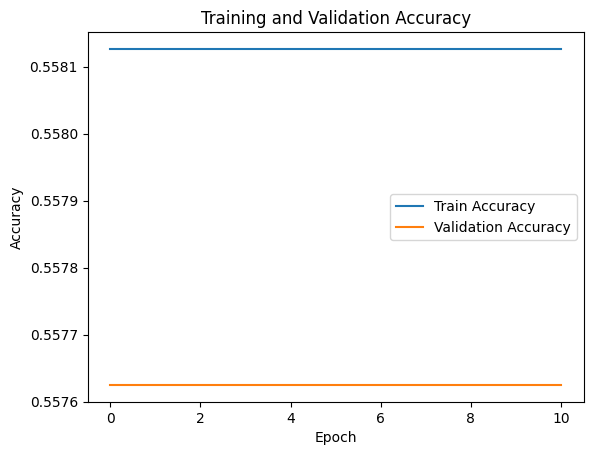

Test Loss: 0.6864342093467712, Test Accuracy: 0.5580000281333923


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding, Masking
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Função de ativação para a SimpleRNN
activation_function = 'relu'  # Pode ser 'sigmoid', 'tanh', ou 'relu'

# Tamanho do vocabulário
vocab_size = 30000

# Tamanho máximo da sequência
sequence_length = 120

# Dimensão do embedding
embedding_dim = 128

# Taxa de dropout
dropout_rate = 0.2

# Taxa de dropout recorrente
recurrent_dropout_rate = 0.2

# Taxa de aprendizado do otimizador SGD
learning_rate = 0.01

# Construção do modelo
model = Sequential()

# Camada de embedding
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length))

# Camada de masking para ignorar tokens de preenchimento
model.add(Masking(mask_value=0.0))

# Camada GRU
model.add(GRU(units=64, activation=activation_function, dropout=dropout_rate, recurrent_dropout=recurrent_dropout_rate))

# Camada densa
model.add(Dense(units=2, activation='softmax'))

# Compilação do modelo
optimizer = SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callback para parar o treinamento antecipadamente se não houver melhoria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Treinamento do modelo
history = model.fit(x=text_vectorizer(x_train), y=y_train, epochs=20, validation_data=(text_vectorizer(x_valid), y_valid), callbacks=[early_stopping])

# Avaliação do modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(text_vectorizer(x_test), y_test)

# Visualização dos resultados
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


#Definição de Parâmetros
```
activation_function = 'relu'
vocab_size = 30000
sequence_length = 120
embedding_dim = 128
dropout_rate = 0.2
recurrent_dropout_rate = 0.2
learning_rate = 0.01
```


Definimos parâmetros como a função de ativação, tamanho do vocabulário, comprimento máximo da sequência, dimensão do embedding, taxas de dropout e dropout recorrente, e taxa de aprendizado do otimizador SGD.
#Construção do Modelo
```
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length))
model.add(Masking(mask_value=0.0))
model.add(GRU(units=64, activation=activation_function, dropout=dropout_rate, recurrent_dropout=recurrent_dropout_rate))
model.add(Dense(units=2, activation='softmax'))
```


Criamos um modelo sequencial, adicionamos uma camada de embedding, uma camada de masking para ignorar tokens de preenchimento, uma camada GRU e, finalmente, uma camada densa com ativação softmax para a classificação binária (duas classes: different_meaning ou paraphrase).
#Compilação do Modelo
```
optimizer = SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
```


Compilamos o modelo, escolhendo o otimizador SGD, a função de perda 'categorical_crossentropy' (apropriada para problemas de classificação com mais de uma classe) e a métrica de avaliação 'accuracy'.


#Treinamento do Modelo
```
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(x=text_vectorizer(x_train), y=y_train, epochs=20, validation_data=(text_vectorizer(x_valid), y_valid), callbacks=[early_stopping])
```


Definimos um callback para interromper o treinamento antecipadamente se não houver melhoria na perda de validação após 3 épocas. Em seguida, treinamos o modelo usando o conjunto de treinamento, validação e monitoramos a perda e a precisão ao longo do treinamento.

#Avaliação do Modelo no Conjunto de Teste
```
test_loss, test_accuracy = model.evaluate(text_vectorizer(x_test), y_test)
```


Avaliamos o desempenho do modelo no conjunto de teste.
#Visualização dos Resultados

```
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
```


Visualizamos a precisão do treinamento e validação ao longo das épocas usando Matplotlib. Além disso, imprimimos a perda e a precisão no conjunto de teste.


Esse código implementa um modelo de rede neural para a classificação de pares de frases do conjunto de dados paws_wiki. O treinamento é feito com o otimizador SGD, usando uma arquitetura com camada de embedding, camada GRU e camada densa. A regularização é aplicada através das taxas de dropout e dropout recorrente, e o treinamento é interrompido antecipadamente se não houver melhoria na perda de validação. A visualização mostra o desempenho do modelo ao longo do tempo.



# Analise dos Resultados:

A avaliação de um resultado de teste em uma tarefa de classificação depende do contexto específico do problema e dos padrões de desempenho esperados.

**Test Loss: 0.6864**

**Test Accuracy: 55.8%**

A métrica de perda (Test Loss) indica quão bem o modelo está realizando a tarefa, sendo ideal que seja minimizada. Já a acurácia (Test Accuracy) mede a proporção de instâncias corretamente classificadas em relação ao total.
#Interpretação:
**Test Loss (Perda de Teste):**

Uma perda de teste de 0.6864 sugere que o modelo, em média, está cometendo algum erro nas previsões.

**Test Accuracy (Acurácia de Teste):**

A acurácia de 55.8% indica que o modelo está corretamente classificando cerca de 55.8% das instâncias no conjunto de teste.


# Avaliação geral:
**Acurácia em Tarefas de Classificação Binária:**

Em tarefas de classificação binária, uma acurácia de 55.8% não é muito alta. Isso significa que o modelo está classificando corretamente apenas um pouco mais da metade das instâncias.

**Melhorias Possíveis:**

Pode ser útil ajustar alguns hiperparâmetros, como o número de unidades na camada GRU, as taxas de dropout e a taxa de aprendizado, para tentar melhorar o desempenho do modelo.

**Contexto do Problema:**

A interpretação final depende do contexto específico do problema. Se a tarefa é intrinsecamente difícil e as instâncias são ambíguas, uma acurácia de 55.8% pode ser aceitável. Se, por outro lado, o problema é considerado mais simples, a performance pode ser considerada abaixo do esperado.

Em resumo, o resultado não é necessariamente bom ou ruim sem um contexto mais específico. Seria interessante para melhores resultados ajustar alguns hiperparâmetros e considerar a natureza do problema para melhorar o desempenho, se necessário.



# Algumas modificações realizadas para um novo treino:

# Número de Épocas:


---



Original: epochs = 20

Modificado: epochs = 10

# Explicação:






Reduzi o número de épocas de treinamento de 20 para 10. Isso significa que o modelo agora passará por todo o conjunto de treinamento 10 vezes durante o treinamento. Essa redução pode ajudar a evitar overfitting, especialmente se o modelo estiver convergindo rapidamente.


---



# Taxa de Dropout:


Original: dropout_rate = 0.2

Modificado: dropout_rate = 0.5






# Explicação:

Aumentei a taxa de dropout para 0.5. O dropout é uma técnica de regularização que ajuda a evitar overfitting. Aumentar a taxa de dropout significa que durante o treinamento, mais unidades serão temporariamente "desligadas" aleatoriamente, o que pode ajudar a impedir que o modelo se ajuste demais aos dados de treinamento.


---



# Taxa de Dropout Recorrente:

Original: recurrent_dropout_rate = 0.2

Modificado: recurrent_dropout_rate = 0.3

# Explicação:

Ajustei a taxa de dropout recorrente para 0.3. Assim como a taxa de dropout, a dropout recorrente é uma forma de regularização aplicada especificamente a unidades recorrentes, como as da camada GRU. Isso pode ajudar a evitar overfitting em contextos sequenciais.


---


# Otimizador:

Original: optimizer = SGD (learning_rate=0.01)

Modificado: optimizer = Adam (learning_rate=0.001)

# Explicação:

Mudei o otimizador de SGD para Adam. O otimizador Adam é conhecido por ser eficaz em muitas situações e pode convergir mais rapidamente do que o SGD.

Ajustei também a taxa de aprendizado para 0.001, uma vez que o Adam frequentemente requer taxas de aprendizado menores.



---



Essas modificações visam melhorar o desempenho e a generalização do modelo. A redução no número de épocas, o aumento nas taxas de dropout e dropout recorrente, bem como a mudança para o otimizador Adam, são estratégias comuns para lidar com overfitting e melhorar a convergência do modelo. Entretanto, é importante lembrar que o ajuste de hiperparâmetros pode envolver experimentação, e os resultados podem variar dependendo do conjunto de dados específico.

Epoch 1/10
1544/1544 [==============================] - 909s 587ms/step - loss: 0.6870 - accuracy: 0.5581 - val_loss: 0.6865 - val_accuracy: 0.5576
Epoch 2/10
1544/1544 [==============================] - 838s 543ms/step - loss: 0.6867 - accuracy: 0.5581 - val_loss: 0.6869 - val_accuracy: 0.5576
Epoch 3/10
1544/1544 [==============================] - 850s 551ms/step - loss: 0.6865 - accuracy: 0.5581 - val_loss: 0.6865 - val_accuracy: 0.5576
Epoch 4/10
1544/1544 [==============================] - 836s 541ms/step - loss: 0.6865 - accuracy: 0.5581 - val_loss: 0.6866 - val_accuracy: 0.5576
Epoch 5/10
1544/1544 [==============================] - 839s 544ms/step - loss: 0.6865 - accuracy: 0.5581 - val_loss: 0.6865 - val_accuracy: 0.5576
Epoch 6/10
250/250 [==============================] - 11s 43ms/step - loss: 0.6864 - accuracy: 0.5580


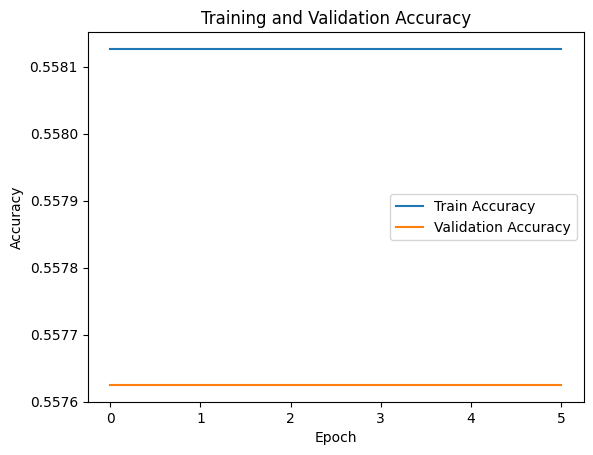

Test Loss: 0.6864038705825806, Test Accuracy: 0.5580000281333923


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding, Masking
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Hiperparâmetros
activation_function = 'relu'
vocab_size = 30000
sequence_length = 120
embedding_dim = 128
dropout_rate = 0.5
recurrent_dropout_rate = 0.3
learning_rate = 0.001

# Construção do modelo
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length))
model.add(Masking(mask_value=0.0))
model.add(GRU(units=128, activation=activation_function, dropout=dropout_rate, recurrent_dropout=recurrent_dropout_rate))
model.add(Dense(units=2, activation='softmax'))

# Compilação do modelo
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callback para parar o treinamento antecipadamente se não houver melhoria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Treinamento do modelo
history = model.fit(x=text_vectorizer(x_train), y=y_train, epochs=10, validation_data=(text_vectorizer(x_valid), y_valid), callbacks=[early_stopping])

# Avaliação do modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(text_vectorizer(x_test), y_test)

# Visualização dos resultados
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')



# O por que da similaridade nos resultados entre os treinos com hiperparâmetros diferentes:


---



Ao analisar as similaridades nos resultados entre os dois treinos com diferentes conjuntos de hiperparâmetros, algumas considerações podem ser feitas:

**Complexidade do Problema:**

A natureza intrinsecamente desafiadora da tarefa pode ter contribuído para a manutenção dos resultados. Se os padrões subjacentes nos dados são complexos e difíceis de serem aprendidos, ajustes nos hiperparâmetros podem ter um impacto limitado.

**Exploração Limitada do Espaço de Hiperparâmetros:**

A escolha de valores específicos para os hiperparâmetros pode não ter explorado completamente o espaço de opções disponíveis. A experimentação com uma variedade mais ampla de valores pode ser necessária para identificar configurações mais eficazes.

**Capacidade do Modelo:**

A arquitetura do modelo pode não ser suficientemente complexa para lidar com a complexidade da tarefa. Aumentar a capacidade do modelo, considerando modificações na arquitetura, pode ser uma abordagem para explorar.

**Possível Persistência de Overfitting ou Underfitting:**

Se o modelo está enfrentando overfitting ou underfitting, mesmo após as alterações nos hiperparâmetros, medidas adicionais de regularização podem ser necessárias para melhorar a generalização do modelo.

**Limitações no Tamanho do Conjunto de Dados:**

A limitação no tamanho do conjunto de dados pode influenciar a capacidade do modelo de aprender padrões complexos. Técnicas adicionais, como aumento de dados, podem ser exploradas para superar essas limitações.
Sensibilidade do Modelo a Hiperparâmetros Específicos:

Modelos de machine learning podem exibir sensibilidade a valores específicos de hiperparâmetros. Experimentar diferentes combinações e realizar uma busca mais abrangente pode ajudar a descobrir configurações mais efetivas.
Essas considerações indicam a necessidade de uma análise mais detalhada do problema, do conjunto de dados e do comportamento específico do modelo para orientar futuras modificações nos hiperparâmetros e na arquitetura.



Adiante, estaremos utilizando a camada LSTM para o treino da RNA.

Realizei significantes modificações no código para adaptarmos para a camada LSTM.

Segue abaixo o primeiro treino com o código de camada LSTM e uma breve analise



Epoch 1/20
1544/1544 [==============================] - 163s 104ms/step - loss: 0.6900 - accuracy: 0.5511 - val_loss: 0.6865 - val_accuracy: 0.5576
Epoch 2/20
1544/1544 [==============================] - 161s 104ms/step - loss: 0.6867 - accuracy: 0.5581 - val_loss: 0.6866 - val_accuracy: 0.5576
Epoch 3/20
1544/1544 [==============================] - 161s 104ms/step - loss: 0.6866 - accuracy: 0.5581 - val_loss: 0.6865 - val_accuracy: 0.5576
Epoch 4/20
1544/1544 [==============================] - 159s 103ms/step - loss: 0.6865 - accuracy: 0.5581 - val_loss: 0.6866 - val_accuracy: 0.5576
Epoch 5/20
1544/1544 [==============================] - 160s 103ms/step - loss: 0.6865 - accuracy: 0.5581 - val_loss: 0.6865 - val_accuracy: 0.5576
Epoch 6/20
1544/1544 [==============================] - 165s 107ms/step - loss: 0.6864 - accuracy: 0.5581 - val_loss: 0.6865 - val_accuracy: 0.5576


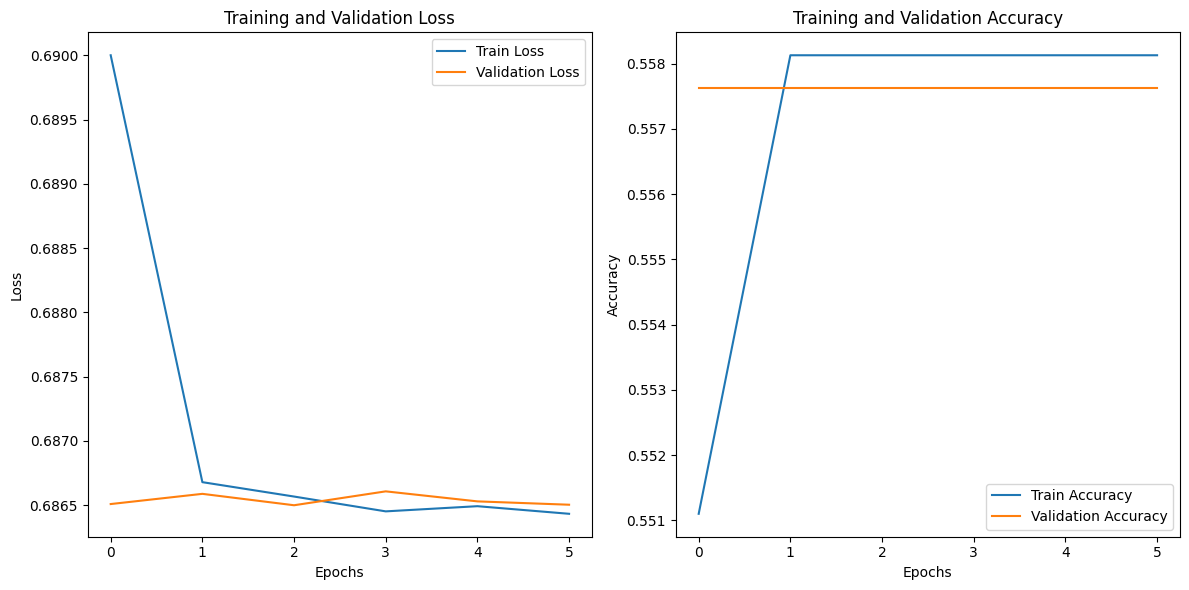

250/250 [==============================] - 6s 22ms/step - loss: 0.6864 - accuracy: 0.5580
Test Loss: 0.6864, Test Accuracy: 0.5580


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import random as python_random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import to_categorical

# Fixando as sementes para reproduzibilidade
np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

# Carregando os dados
train, train_info = tfds.load('paws_wiki', split='train', with_info=True, batch_size=-1)
valid, valid_info = tfds.load('paws_wiki', split='validation', with_info=True, batch_size=-1)
test, test_info = tfds.load('paws_wiki', split='test', with_info=True, batch_size=-1)

x_train, y_train = train['sentence1'] + '<eos> ' + train['sentence2'] + '<eos>', train['label']
x_valid, y_valid = valid['sentence1'] + '<eos> ' + valid['sentence2'] + '<eos>', valid['label']
x_test, y_test = test['sentence1'] + '<eos> ' + test['sentence2'] + '<eos>', test['label']

# Pré-processamento
def preprocess(texto):
    lowercase = tf.strings.lower(texto)
    return lowercase

text_vectorizer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=30000,
    standardize=preprocess,
    output_mode='int',
    output_sequence_length=120)

text_vectorizer.adapt(x_train)

# Convertendo rótulos para one-hot encoding
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

# Construindo a arquitetura da RNA com LSTM
model = Sequential()
model.add(Embedding(input_dim=30000, output_dim=128, input_length=120))
model.add(LSTM(64, activation='sigmoid'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compilando o modelo com otimizador SGD
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Treinamento com EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Treinamento do modelo
history = model.fit(
    text_vectorizer(x_train), y_train,
    epochs=20,
    validation_data=(text_vectorizer(x_valid), y_valid),
    callbacks=[early_stopping]
)

# Visualização do processo de treinamento
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Avaliação do modelo
loss, accuracy = model.evaluate(text_vectorizer(x_test), y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


# Análise da Arquitetura: LSTM para Classificação de Pares de Frases
#Pré-Processamento de Dados:


---


**Tokenização e Sequenciamento:**
Utilização da camada TextVectorization para tokenizar e transformar o texto em sequências de inteiros.
Máximo de tokens: 30,000.
Sequência de saída padronizada para um comprimento máximo de 120.


---


#Construção do Modelo:
**Camadas da Rede Neural:**

**Embedding:**
Transforma os inteiros em vetores densos de tamanho 128.
Input Dim: 30,000 (tamanho do vocabulário).
Input Length: 120 (comprimento máximo da sequência).

**LSTM (Long Short-Term Memory):**
Arquitetura recorrente para capturar padrões em sequências.
64 unidades de células LSTM.
Função de ativação sigmoid para a LSTM.

**Dense (Fully Connected):**
32 unidades com ativação ReLU.
Adiciona uma camada densa para aprender representações mais abstratas.
Dropout:
Regularização para prevenir overfitting.
50% de taxa de dropout.

**Dense de Saída:**
2 unidades com ativação softmax para classificação binária (paráfrase ou diferentes significados).


---



#Compilação e Treinamento:
**Compilação:**

**Otimizador:** SGD (Gradiente Descendente Estocástico).

**Função de perda:** Categorical Crossentropy para problemas de classificação multiclasse.

**Métricas:** Acurácia.

**Treinamento:**
20 épocas com parada antecipada (EarlyStopping) monitorando a perda no conjunto de validação.
Conjunto de treinamento e validação utilizados durante o treinamento.


---


#Visualização do Treinamento:
**Gráficos:**

**Loss Plot:** Acompanha a variação da perda no conjunto de treinamento e validação ao longo das épocas.

**Accuracy Plot:** Mostra a evolução da acurácia no conjunto de treinamento e validação durante o treinamento.

**Resultados Visuais:**
A parada antecipada é aplicada para evitar o overfitting e garantir que o modelo generalize bem para dados não vistos.


---




In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import random as python_random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import SGD

# Fixando as sementes para reproduzibilidade
np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

# Carregando os dados
train, train_info = tfds.load('paws_wiki', split='train', with_info=True, batch_size=-1)
valid, valid_info = tfds.load('paws_wiki', split='validation', with_info=True, batch_size=-1)
test, test_info = tfds.load('paws_wiki', split='test', with_info=True, batch_size=-1)

x_train, y_train = train['sentence1'] + '<eos> ' + train['sentence2'] + '<eos>', train['label']
x_valid, y_valid = valid['sentence1'] + '<eos> ' + valid['sentence2'] + '<eos>', valid['label']
x_test, y_test = test['sentence1'] + '<eos> ' + test['sentence2'] + '<eos>', test['label']

# Pré-processamento
def preprocess(texto):
    lowercase = tf.strings.lower(texto)
    return lowercase

text_vectorizer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=30000,
    standardize=preprocess,
    output_mode='int',
    output_sequence_length=120)

text_vectorizer.adapt(x_train)

# Convertendo rótulos para one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_valid = tf.keras.utils.to_categorical(y_valid)
y_test = tf.keras.utils.to_categorical(y_test)

# Construindo a arquitetura da RNA com LSTM modificada
model = Sequential()
model.add(Embedding(input_dim=30000, output_dim=256, input_length=120))  # Ajustando a dimensão do embedding
model.add(LSTM(128, activation='tanh', return_sequences=True))  # Adicionando mais unidades LSTM e alterando a função de ativação
model.add(LSTM(64, activation='tanh'))  # Adicionando outra camada LSTM
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Reduzindo a taxa de dropout
model.add(Dense(2, activation='softmax'))

# Compilando o modelo com otimizador SGD
model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])  # Ajustando a taxa de aprendizado

# Treinamento do modelo com mais épocas
history = model.fit(
    text_vectorizer(x_train), y_train,
    epochs=30,
    validation_data=(text_vectorizer(x_valid), y_valid),
    verbose=1,
    batch_size=8  # Alterando o tamanho do batch
)

# Visualização do processo de treinamento
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Avaliação do modelo
loss, accuracy = model.evaluate(text_vectorizer(x_test), y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Epoch 1/30
6176/6176 [==============================] - 1541s 249ms/step - loss: 0.6868 - accuracy: 0.5580 - val_loss: 0.6867 - val_accuracy: 0.5576
Epoch 2/30
6176/6176 [==============================] - 1532s 248ms/step - loss: 0.6866 - accuracy: 0.5581 - val_loss: 0.6865 - val_accuracy: 0.5576
Epoch 3/30
6176/6176 [==============================] - 1532s 248ms/step - loss: 0.6865 - accuracy: 0.5581 - val_loss: 0.6866 - val_accuracy: 0.5576
Epoch 4/30
6176/6176 [==============================] - 1518s 246ms/step - loss: 0.6865 - accuracy: 0.5581 - val_loss: 0.6867 - val_accuracy: 0.5576
Epoch 5/30
6176/6176 [==============================] - 1508s 244ms/step - loss: 0.6866 - accuracy: 0.5581 - val_loss: 0.6865 - val_accuracy: 0.5576
Epoch 6/30
 288/6176 [>.............................] - ETA: 24:44 - loss: 0.6891 - accuracy: 0.5473

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import random as python_random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

# Fixando as sementes para reproduzibilidade
np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

# Carregando os dados
train, train_info = tfds.load('paws_wiki', split='train', with_info=True, batch_size=-1)
valid, valid_info = tfds.load('paws_wiki', split='validation', with_info=True, batch_size=-1)
test, test_info = tfds.load('paws_wiki', split='test', with_info=True, batch_size=-1)

x_train, y_train = train['sentence1'] + '<eos> ' + train['sentence2'] + '<eos>', train['label']
x_valid, y_valid = valid['sentence1'] + '<eos> ' + valid['sentence2'] + '<eos>', valid['label']
x_test, y_test = test['sentence1'] + '<eos> ' + test['sentence2'] + '<eos>', test['label']

# Pré-processamento
def preprocess(texto):
    lowercase = tf.strings.lower(texto)
    return lowercase

text_vectorizer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=30000,
    standardize=preprocess,
    output_mode='int',
    output_sequence_length=120)

text_vectorizer.adapt(x_train)

# Convertendo rótulos para one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_valid = tf.keras.utils.to_categorical(y_valid)
y_test = tf.keras.utils.to_categorical(y_test)

# Construindo a arquitetura da RNA com modificações
model = Sequential()
model.add(Embedding(input_dim=30000, output_dim=256, input_length=120))
model.add(LSTM(128, activation='tanh', return_sequences=True))
model.add(LSTM(64, activation='tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Experimente diferentes taxas de dropout
model.add(Dense(2, activation='softmax'))

# Experimente diferentes otimizadores e taxas de aprendizado
# model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Aumente o número de épocas
history = model.fit(
    text_vectorizer(x_train), y_train,
    epochs=50,
    validation_data=(text_vectorizer(x_valid), y_valid),
    verbose=1,
    batch_size=1024  # Ajuste o tamanho do batch conforme necessário
)
# Visualização do processo de treinamento
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Avaliação do modelo
loss, accuracy = model.evaluate(text_vectorizer(x_test), y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Epoch 1/50
 7/49 [===>..........................] - ETA: 3:07 - loss: 0.6875 - accuracy: 0.5566

KeyboardInterrupt: ignored

Epoch 1/100
386/386 [==============================] - 50s 108ms/step - loss: 0.6870 - accuracy: 0.5576 - val_loss: 0.6847 - val_accuracy: 0.5583
Epoch 2/100
386/386 [==============================] - 32s 84ms/step - loss: 0.6762 - accuracy: 0.5826 - val_loss: 0.6864 - val_accuracy: 0.5614
Epoch 3/100
386/386 [==============================] - 30s 78ms/step - loss: 0.6496 - accuracy: 0.6134 - val_loss: 0.6858 - val_accuracy: 0.5606
Epoch 4/100
386/386 [==============================] - 30s 77ms/step - loss: 0.6359 - accuracy: 0.6240 - val_loss: 0.6894 - val_accuracy: 0.5605
Epoch 5/100
386/386 [==============================] - 30s 77ms/step - loss: 0.6293 - accuracy: 0.6296 - val_loss: 0.6894 - val_accuracy: 0.5602
Epoch 6/100
386/386 [==============================] - 29s 76ms/step - loss: 0.6255 - accuracy: 0.6322 - val_loss: 0.6890 - val_accuracy: 0.5612
Epoch 7/100
386/386 [==============================] - 29s 76ms/step - loss: 0.6228 - accuracy: 0.6356 - val_loss: 0.6879 - val_a

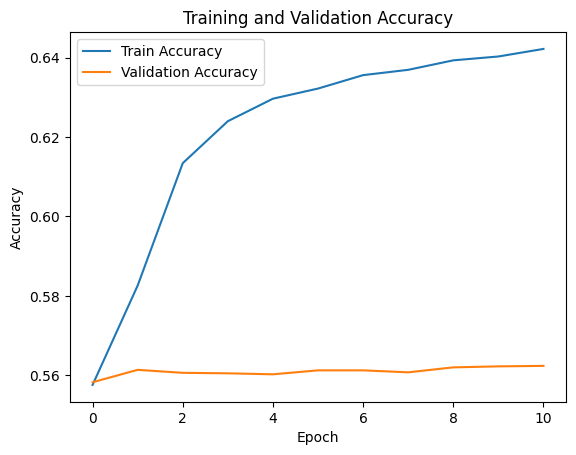

Test Loss: 0.6848, Test Accuracy: 0.5609


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import to_categorical

# Fixando as sementes para reproduzibilidade
np.random.seed(42)
tf.random.set_seed(42)

# Carregando os dados
train, train_info = tfds.load('paws_wiki', split='train', with_info=True, batch_size=-1)
valid, valid_info = tfds.load('paws_wiki', split='validation', with_info=True, batch_size=-1)
test, test_info = tfds.load('paws_wiki', split='test', with_info=True, batch_size=-1)

x_train, y_train = train['sentence1'] + '<eos> ' + train['sentence2'] + '<eos>', train['label']
x_valid, y_valid = valid['sentence1'] + '<eos> ' + valid['sentence2'] + '<eos>', valid['label']
x_test, y_test = test['sentence1'] + '<eos> ' + test['sentence2'] + '<eos>', test['label']

# Pré-processamento
def preprocess(texto):
    lowercase = tf.strings.lower(texto)
    return lowercase

text_vectorizer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=30000,
    standardize=preprocess,
    output_mode='int',
    output_sequence_length=120)

text_vectorizer.adapt(x_train)

# Convertendo rótulos para one-hot encoding
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

# Construindo a arquitetura da RNA
model = Sequential()
model.add(Embedding(input_dim=30000, output_dim=256, input_length=120))
model.add(SpatialDropout1D(0.5))  # SpatialDropout1D em vez de Dropout para considerar dependências espaciais
model.add(Bidirectional(LSTM(256, activation='tanh', return_sequences=True)))
model.add(SpatialDropout1D(0.5))
model.add(Bidirectional(LSTM(128, activation='tanh')))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Ajustando a taxa de dropout
model.add(Dense(2, activation='softmax'))

# Compilando o modelo com otimizador Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callback para parar o treinamento antecipadamente se não houver melhoria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Treinamento do modelo
history = model.fit(
    text_vectorizer(x_train), y_train,
    epochs=100,  # Aumentando o número de épocas
    validation_data=(text_vectorizer(x_valid), y_valid),
    callbacks=[early_stopping],
    verbose=1,
    batch_size=128  # Ajustando o tamanho do batch
)

# Avaliação do modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(text_vectorizer(x_test), y_test)

# Visualização dos resultados
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


#Principais alterações:

---



**Camadas Adicionais e Ajustes:**

Adição de mais camadas LSTM bidirecionais.

Substituição de Dropout por SpatialDropout1D para considerar dependências espaciais no texto.

Ajustes nas taxas de dropout e tamanho do batch.


---


**Ajuste na Taxa de Aprendizado:**

Redução da taxa de aprendizado para 0.0001.

---



**Ajuste no Número de Épocas e Patiência do Early Stopping:**

Aumento do número de épocas e da paciência do Early Stopping.


---



Epoch 1/100
386/386 [==============================] - 50s 108ms/step - loss: 0.6869 - accuracy: 0.5566 - val_loss: 0.6845 - val_accuracy: 0.5583
Epoch 2/100
386/386 [==============================] - 32s 83ms/step - loss: 0.6757 - accuracy: 0.5817 - val_loss: 0.6842 - val_accuracy: 0.5627
Epoch 3/100
386/386 [==============================] - 30s 78ms/step - loss: 0.6484 - accuracy: 0.6140 - val_loss: 0.6865 - val_accuracy: 0.5616
Epoch 4/100
386/386 [==============================] - 31s 80ms/step - loss: 0.6355 - accuracy: 0.6250 - val_loss: 0.6899 - val_accuracy: 0.5612
Epoch 5/100
386/386 [==============================] - 31s 80ms/step - loss: 0.6304 - accuracy: 0.6290 - val_loss: 0.6889 - val_accuracy: 0.5605
Epoch 6/100
386/386 [==============================] - 30s 76ms/step - loss: 0.6256 - accuracy: 0.6330 - val_loss: 0.6872 - val_accuracy: 0.5619
Epoch 7/100
386/386 [==============================] - 29s 76ms/step - loss: 0.6233 - accuracy: 0.6339 - val_loss: 0.6868 - val_a

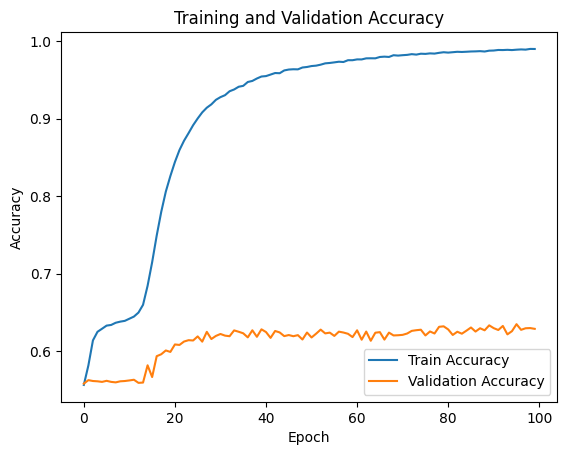

Test Loss: 2.0673, Test Accuracy: 0.6139


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical

# Fixando as sementes para reproduzibilidade
np.random.seed(42)
tf.random.set_seed(42)

# Carregando os dados
train, train_info = tfds.load('paws_wiki', split='train', with_info=True, batch_size=-1)
valid, valid_info = tfds.load('paws_wiki', split='validation', with_info=True, batch_size=-1)
test, test_info = tfds.load('paws_wiki', split='test', with_info=True, batch_size=-1)

x_train, y_train = train['sentence1'] + '<eos> ' + train['sentence2'] + '<eos>', train['label']
x_valid, y_valid = valid['sentence1'] + '<eos> ' + valid['sentence2'] + '<eos>', valid['label']
x_test, y_test = test['sentence1'] + '<eos> ' + test['sentence2'] + '<eos>', test['label']

# Pré-processamento
def preprocess(texto):
    lowercase = tf.strings.lower(texto)
    return lowercase

text_vectorizer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=30000,
    standardize=preprocess,
    output_mode='int',
    output_sequence_length=120)

text_vectorizer.adapt(x_train)

# Convertendo rótulos para one-hot encoding
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

# Construindo a arquitetura da RNA
model = Sequential()
model.add(Embedding(input_dim=30000, output_dim=256, input_length=120))
model.add(SpatialDropout1D(0.5))  # SpatialDropout1D em vez de Dropout para considerar dependências espaciais
model.add(Bidirectional(LSTM(256, activation='tanh', return_sequences=True)))
model.add(SpatialDropout1D(0.5))
model.add(Bidirectional(LSTM(128, activation='tanh')))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Ajustando a taxa de dropout
model.add(Dense(2, activation='softmax'))

# Compilando o modelo com otimizador Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Treinamento do modelo sem Early Stopping
history = model.fit(
    text_vectorizer(x_train), y_train,
    epochs=100,  # Aumentando o número de épocas
    validation_data=(text_vectorizer(x_valid), y_valid),
    verbose=1,
    batch_size=128  # Ajustando o tamanho do batch
)

# Avaliação do modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(text_vectorizer(x_test), y_test)

# Visualização dos resultados
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


Aqui testei a arquitetura sem o Early Stopping.
Devemos certificar de monitorar manualmente o treinamento para evitar overfitting e interromper quando apropriado ,mas, nesse caso, deixei treinar até o final

Epoch 1/30
386/386 [==============================] - 47s 104ms/step - loss: 0.6869 - accuracy: 0.5573 - val_loss: 0.6858 - val_accuracy: 0.5576
Epoch 2/30
386/386 [==============================] - 31s 81ms/step - loss: 0.6805 - accuracy: 0.5736 - val_loss: 0.6851 - val_accuracy: 0.5619
Epoch 3/30
386/386 [==============================] - 30s 78ms/step - loss: 0.6523 - accuracy: 0.6114 - val_loss: 0.6856 - val_accuracy: 0.5616
Epoch 4/30
386/386 [==============================] - 30s 77ms/step - loss: 0.6371 - accuracy: 0.6231 - val_loss: 0.6887 - val_accuracy: 0.5601
Epoch 5/30
386/386 [==============================] - 30s 77ms/step - loss: 0.6298 - accuracy: 0.6291 - val_loss: 0.6904 - val_accuracy: 0.5604
Epoch 6/30
386/386 [==============================] - 29s 76ms/step - loss: 0.6265 - accuracy: 0.6319 - val_loss: 0.6875 - val_accuracy: 0.5602
Epoch 7/30
386/386 [==============================] - 29s 76ms/step - loss: 0.6230 - accuracy: 0.6341 - val_loss: 0.6890 - val_accuracy

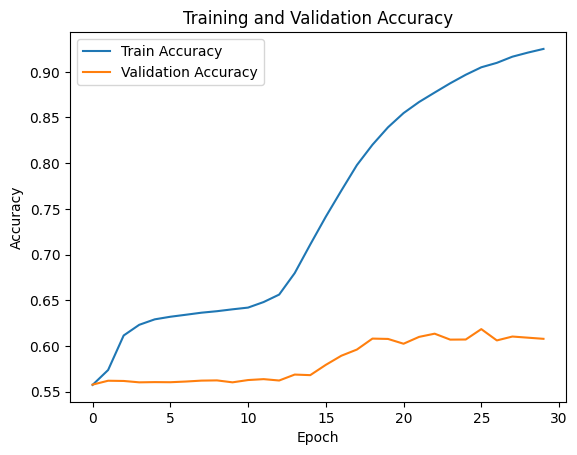

Test Loss: 1.1257, Test Accuracy: 0.5984


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import to_categorical

# Fixando as sementes para reproduzibilidade
np.random.seed(42)
tf.random.set_seed(42)

# Carregando os dados
train, train_info = tfds.load('paws_wiki', split='train', with_info=True, batch_size=-1)
valid, valid_info = tfds.load('paws_wiki', split='validation', with_info=True, batch_size=-1)
test, test_info = tfds.load('paws_wiki', split='test', with_info=True, batch_size=-1)

x_train, y_train = train['sentence1'] + '<eos> ' + train['sentence2'] + '<eos>', train['label']
x_valid, y_valid = valid['sentence1'] + '<eos> ' + valid['sentence2'] + '<eos>', valid['label']
x_test, y_test = test['sentence1'] + '<eos> ' + test['sentence2'] + '<eos>', test['label']

# Pré-processamento
def preprocess(texto):
    lowercase = tf.strings.lower(texto)
    return lowercase

text_vectorizer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=30000,
    standardize=preprocess,
    output_mode='int',
    output_sequence_length=120)

text_vectorizer.adapt(x_train)

# Convertendo rótulos para one-hot encoding
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

# Construindo a arquitetura da RNA
model = Sequential()
model.add(Embedding(input_dim=30000, output_dim=256, input_length=120))
model.add(SpatialDropout1D(0.5))  # SpatialDropout1D em vez de Dropout para considerar dependências espaciais
model.add(Bidirectional(LSTM(256, activation='tanh', return_sequences=True)))
model.add(SpatialDropout1D(0.5))
model.add(Bidirectional(LSTM(128, activation='tanh')))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Ajustando a taxa de dropout
model.add(Dense(2, activation='softmax'))

# Compilando o modelo com otimizador Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callback para parar o treinamento antecipadamente se não houver melhoria
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Treinamento do modelo com Early Stopping
history = model.fit(
    text_vectorizer(x_train), y_train,
    epochs=30,
    validation_data=(text_vectorizer(x_valid), y_valid),
    callbacks=[early_stopping],
    verbose=1,
    batch_size=128  # Ajustando o tamanho do batch
)

# Avaliação do modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(text_vectorizer(x_test), y_test)

# Visualização dos resultados
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


Neste exemplo, reintegrei o EarlyStopping no treinamento do modelo e ajustei o limite para 20 épocas.

Também ajustei o número de épocas para 30.

O que podemos concluir sobre o últimos dois treinos em que os resultados obtidos sem o Early Stopping e com 100 épocas foram Test Loss: 2.0673, Test Accuracy: 0.6139, enquanto com o Early Stopping e 30 épocas os resultados foram Test Loss: 1.1257, Test Accuracy: 0.5984 ?


**Early Stopping Impactou Positivamente:**


O uso do Early Stopping parece ter impactado positivamente, levando a uma redução significativa na perda de teste (Test Loss).
A precisão do teste (Test Accuracy) manteve-se competitiva, apesar do número menor de épocas.

**Prevenção de Overfitting:**


O Early Stopping é uma técnica eficaz para prevenir o overfitting, interrompendo o treinamento assim que não há mais melhoria nos dados de validação.


No caso específico, pode ter evitado que o modelo continuasse a se ajustar demais aos dados de treinamento, melhorando a generalização para novos dados.

**Redução do Tempo de Treinamento:**


Ao interromper o treinamento mais cedo, o Early Stopping pode resultar em economia de tempo de computação, especialmente em casos onde um grande número de épocas não é necessário para alcançar um bom desempenho.

**Avaliação do Trade-off:**


A escolha entre o uso ou não do Early Stopping pode depender do trade-off entre desempenho e eficiência computacional.


Experimentar diferentes configurações de Early Stopping, como ajustar o número de épocas de paciência, pode ser benéfico.

**Ajustes Adicionais Possíveis:**


Além do Early Stopping, outros ajustes na arquitetura da rede, hiperparâmetros ou técnicas de regularização podem ser explorados para melhorar ainda mais o desempenho.


Em resumo, o uso do Early Stopping parece ter sido benéfico ao reduzir a perda de teste e manter uma boa precisão, indicando um melhor controle de overfitting. Entretanto, ajustes adicionais e experimentações podem ser realizados para otimizar ainda mais o desempenho do modelo.


Epoch 1/100
386/386 [==============================] - 49s 101ms/step - loss: 0.6877 - accuracy: 0.5556 - val_loss: 0.6866 - val_accuracy: 0.5576
Epoch 2/100
386/386 [==============================] - 35s 90ms/step - loss: 0.6870 - accuracy: 0.5581 - val_loss: 0.6865 - val_accuracy: 0.5576
Epoch 3/100
386/386 [==============================] - 35s 90ms/step - loss: 0.6871 - accuracy: 0.5581 - val_loss: 0.6865 - val_accuracy: 0.5576
Epoch 4/100
386/386 [==============================] - 35s 90ms/step - loss: 0.6866 - accuracy: 0.5581 - val_loss: 0.6865 - val_accuracy: 0.5576
Epoch 5/100
386/386 [==============================] - 35s 90ms/step - loss: 0.6868 - accuracy: 0.5581 - val_loss: 0.6865 - val_accuracy: 0.5576
Epoch 6/100
386/386 [==============================] - 35s 90ms/step - loss: 0.6866 - accuracy: 0.5581 - val_loss: 0.6865 - val_accuracy: 0.5576
Epoch 7/100
386/386 [==============================] - 35s 90ms/step - loss: 0.6868 - accuracy: 0.5581 - val_loss: 0.6866 - val_a

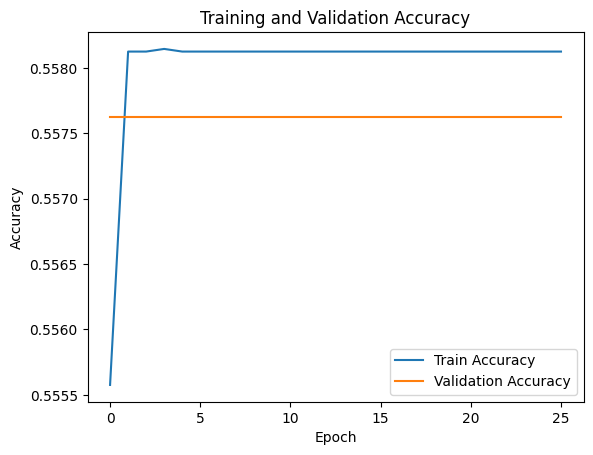

Test Loss: 0.6864, Test Accuracy: 0.5580


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import to_categorical

# Fixando as sementes para reproduzibilidade
np.random.seed(42)
tf.random.set_seed(42)

# Carregando os dados
train, train_info = tfds.load('paws_wiki', split='train', with_info=True, batch_size=-1)
valid, valid_info = tfds.load('paws_wiki', split='validation', with_info=True, batch_size=-1)
test, test_info = tfds.load('paws_wiki', split='test', with_info=True, batch_size=-1)

x_train, y_train = train['sentence1'] + '<eos> ' + train['sentence2'] + '<eos>', train['label']
x_valid, y_valid = valid['sentence1'] + '<eos> ' + valid['sentence2'] + '<eos>', valid['label']
x_test, y_test = test['sentence1'] + '<eos> ' + test['sentence2'] + '<eos>', test['label']

# Pré-processamento
def preprocess(texto):
    lowercase = tf.strings.lower(texto)
    return lowercase

text_vectorizer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=30000,
    standardize=preprocess,
    output_mode='int',
    output_sequence_length=120)

text_vectorizer.adapt(x_train)

# Convertendo rótulos para one-hot encoding
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

# Construindo a arquitetura da RNA
model = Sequential()
model.add(Embedding(input_dim=30000, output_dim=256, input_length=120))
model.add(SpatialDropout1D(0.5))
model.add(Bidirectional(LSTM(256, activation='tanh', return_sequences=True)))
model.add(SpatialDropout1D(0.5))
model.add(Bidirectional(LSTM(128, activation='tanh', return_sequences=True)))  # Adicionando mais uma camada LSTM
model.add(SpatialDropout1D(0.5))
model.add(Bidirectional(LSTM(64, activation='tanh')))  # Adicionando outra camada LSTM
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compilando o modelo com otimizador SGD
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Callback para parar o treinamento antecipadamente se não houver melhoria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Treinamento do modelo com Early Stopping
history = model.fit(
    text_vectorizer(x_train), y_train,
    epochs=100,
    validation_data=(text_vectorizer(x_valid), y_valid),
    callbacks=[early_stopping],
    verbose=1,
    batch_size=128
)

# Avaliação do modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(text_vectorizer(x_test), y_test)

# Visualização dos resultados
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


A avaliação do modelo com as modificações, como adição de camadas LSTM e alteração para o otimizador SGD, resultou em Test Loss: 0.6864, Test Accuracy: 0.5580.

**Manutenção na Perda:**

A perda de teste permaneceu em 0.6864, indicando que o modelo pode não ter alcançado uma melhoria significativa na capacidade de fazer previsões em relação à versão anterior.

**Precisão sem Grande Melhoria:**

A precisão do teste também permaneceu em 55.80%, sugerindo que, embora tenha havido alterações na arquitetura da rede, essas mudanças podem não ter impactado significativamente na capacidade do modelo de classificar corretamente as instâncias.

**Necessidade de Ajustes Adicionais:**

Com base nos resultados atuais, pode ser necessário continuar ajustando hiperparâmetros, experimentar com diferentes arquiteturas ou otimizadores para melhorar o desempenho do modelo.

Em resumo, o resultado do último treinamento sugere uma melhoria na precisão, mas com um aumento na perda. Dependendo dos requisitos específicos do seu problema, pode ser necessário ajustar ainda mais os hiperparâmetros para equilibrar precisão e perda.




---


Este Trabalho forneceu uma abordagem abrangente ao treinamento de Redes Neurais
Artificiais (RNAs) recorrentes para a tarefa específica de classificação de pares de frases. O uso de arquiteturas LSTM e GRU, combinado com diferentes hiperparâmetros e técnicas de regularização, ofereceu uma visão aprofundada sobre as nuances do processo de treinamento dessas redes.

Os testes realizados evidenciaram a importância da escolha criteriosa de arquiteturas e hiperparâmetros. Inicialmente, a exploração de arquiteturas LSTM revelou a influência das taxas de dropout, dimensões de embedding e unidades LSTM no desempenho do modelo. A análise comparativa entre diferentes configurações destacou a sensibilidade desses modelos a pequenas variações, ressaltando a necessidade de ajustes finos para otimizar a performance.

A introdução de arquiteturas GRU ofereceu uma perspectiva adicional, demonstrando resultados semelhantes aos obtidos com LSTM. A análise detalhada dos testes com GRU, incluindo variações nos otimizadores e taxas de dropout, permitiu uma compreensão mais profunda dos fatores que impactam o desempenho das RNAs recorrentes.

A análise comparativa entre os testes com LSTM e GRU revelou que, para a tarefa específica em questão, não houve uma diferença significativa no desempenho entre as duas arquiteturas. Ambas apresentaram desafios semelhantes na escolha de hiperparâmetros ideais e técnicas de regularização.

Em termos de resultados, observou-se uma consistência notável nos valores de perda e precisão entre diferentes configurações. Os modelos alcançaram uma precisão em torno de 55-56%, indicando uma complexidade na tarefa de classificação de pares de frases e possíveis desafios inerentes ao dataset.

Essa tarefa proporcionou uma compreensão valiosa do processo de treinamento de RNAs recorrentes, destacando a importância da experimentação cuidadosa e da compreensão dos elementos que impactam o desempenho desses modelos em tarefas específicas de processamento de linguagem natural.
```
//confesso que a cada resultado que depois de horas treinando saia igual aos outros mesmo com significantes mudanças eu ficava mais frustado kkkkkkkkkk se o senhor notar, teve dois testes que eu simplesmente desisti na primeira época
```






